In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tkinter as tk
from tkinter import messagebox
import joblib as jb
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [51]:
data = pd.read_csv("dataset.csv")
print (data)

     Unnamed: 0       Category  Age Sex   ALB    ALP    ALT    AST   BIL  \
0             1  0=Blood Donor   32   m  38.5   52.5    7.7   22.1   7.5   
1             2  0=Blood Donor   32   m  38.5   70.3   18.0   24.7   3.9   
2             3  0=Blood Donor   32   m  46.9   74.7   36.2   52.6   6.1   
3             4  0=Blood Donor   32   m  43.2   52.0   30.6   22.6  18.9   
4             5  0=Blood Donor   32   m  39.2   74.1   32.6   24.8   9.6   
..          ...            ...  ...  ..   ...    ...    ...    ...   ...   
610         611    3=Cirrhosis   62   f  32.0  416.6    5.9  110.3  50.0   
611         612    3=Cirrhosis   64   f  24.0  102.8    2.9   44.4  20.0   
612         613    3=Cirrhosis   64   f  29.0   87.3    3.5   99.0  48.0   
613         614    3=Cirrhosis   46   f  33.0   84.5   39.0   62.0  20.0   
614         615    3=Cirrhosis   59   f  36.0   92.3  100.0   80.0  12.0   

       CHE  CHOL   CREA    GGT  PROT  
0     6.93  3.23  106.0   12.1  69.0  
1    11.1

In [52]:
data["Category"].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [53]:
data = data.replace(to_replace = 'm', value = 1)
data = data.replace(to_replace = 'f', value = 0)
data = data.replace(to_replace = '0=Blood Donor', value = 0)
data = data.replace(to_replace = '0s=suspect Blood Donor', value = 1)
data = data.replace(to_replace = '1=Hepatitis', value = 2)
data = data.replace(to_replace = '2=Fibrosis', value = 3)
data = data.replace(to_replace = '3=Cirrhosis', value = 4)
print(data)

     Unnamed: 0  Category  Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  \
0             1         0   32    1  38.5   52.5    7.7   22.1   7.5   6.93   
1             2         0   32    1  38.5   70.3   18.0   24.7   3.9  11.17   
2             3         0   32    1  46.9   74.7   36.2   52.6   6.1   8.84   
3             4         0   32    1  43.2   52.0   30.6   22.6  18.9   7.33   
4             5         0   32    1  39.2   74.1   32.6   24.8   9.6   9.15   
..          ...       ...  ...  ...   ...    ...    ...    ...   ...    ...   
610         611         4   62    0  32.0  416.6    5.9  110.3  50.0   5.57   
611         612         4   64    0  24.0  102.8    2.9   44.4  20.0   1.54   
612         613         4   64    0  29.0   87.3    3.5   99.0  48.0   1.66   
613         614         4   46    0  33.0   84.5   39.0   62.0  20.0   3.56   
614         615         4   59    0  36.0   92.3  100.0   80.0  12.0   9.07   

     CHOL   CREA    GGT  PROT  
0    3.23  106.0   

In [105]:
data = data.dropna()

In [106]:
twenty_per=int(len(data)*0.2)
twenty_per_data = data[:twenty_per]
rem20_data = data[twenty_per:]

In [107]:
forty_per=int(len(data)*0.4)
forty_per_data = data[:forty_per]
rem40_data = data[forty_per:]

In [108]:
X=data.iloc[:, 2:]
Y=data.iloc[:, 1:2]
print (X)
print (Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

     Age  Sex   ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  \
0     32    1  38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1   
1     32    1  38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6   
2     32    1  46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2   
3     32    1  43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8   
4     32    1  39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9   
..   ...  ...   ...    ...    ...    ...   ...    ...   ...    ...    ...   
610   62    0  32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9   
611   64    0  24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9   
612   64    0  29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2   
613   46    0  33.0   84.5   39.0   62.0  20.0   3.56  4.20   52.0   50.0   
614   59    0  36.0   92.3  100.0   80.0  12.0   9.07  5.30   67.0   34.0   

     PROT  
0    69.0  
1    76.5  
2    79.3  
3    75.7  
4    68.7  
.. 

In [109]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

D:\ml\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [131]:
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8810810810810811
Precision: 0.8422908622908621
Recall: 0.8810810810810811
F1 Score: 0.8561818029209335


D:\ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

D:\ml\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [130]:
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8918918918918919
Precision: 0.8864059881984411
Recall: 0.8918918918918919
F1 Score: 0.8837270371589208


In [129]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8918918918918919
Precision: 0.8864059881984411
Recall: 0.8918918918918919
F1 Score: 0.8837270371589208


D:\ml\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ml\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8918918918918919
Precision: 0.8864059881984411
Recall: 0.8918918918918919
F1 Score: 0.8837270371589208


In [127]:
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9243243243243243
Precision: 0.9222205628809401
Recall: 0.9243243243243243
F1 Score: 0.917531158246546


D:\ml\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: xlabel='Sex'>

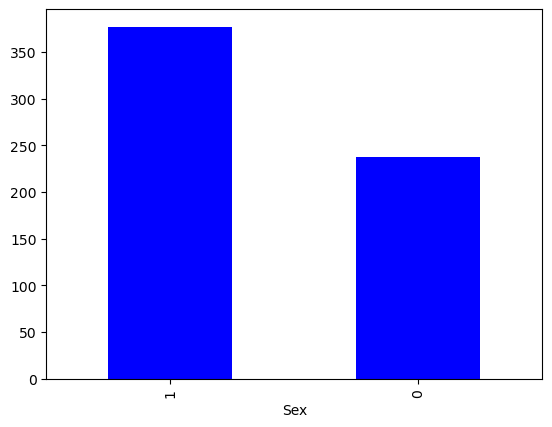

In [68]:
data['Sex'].value_counts().plot.bar(color='blue')

D:\ml\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


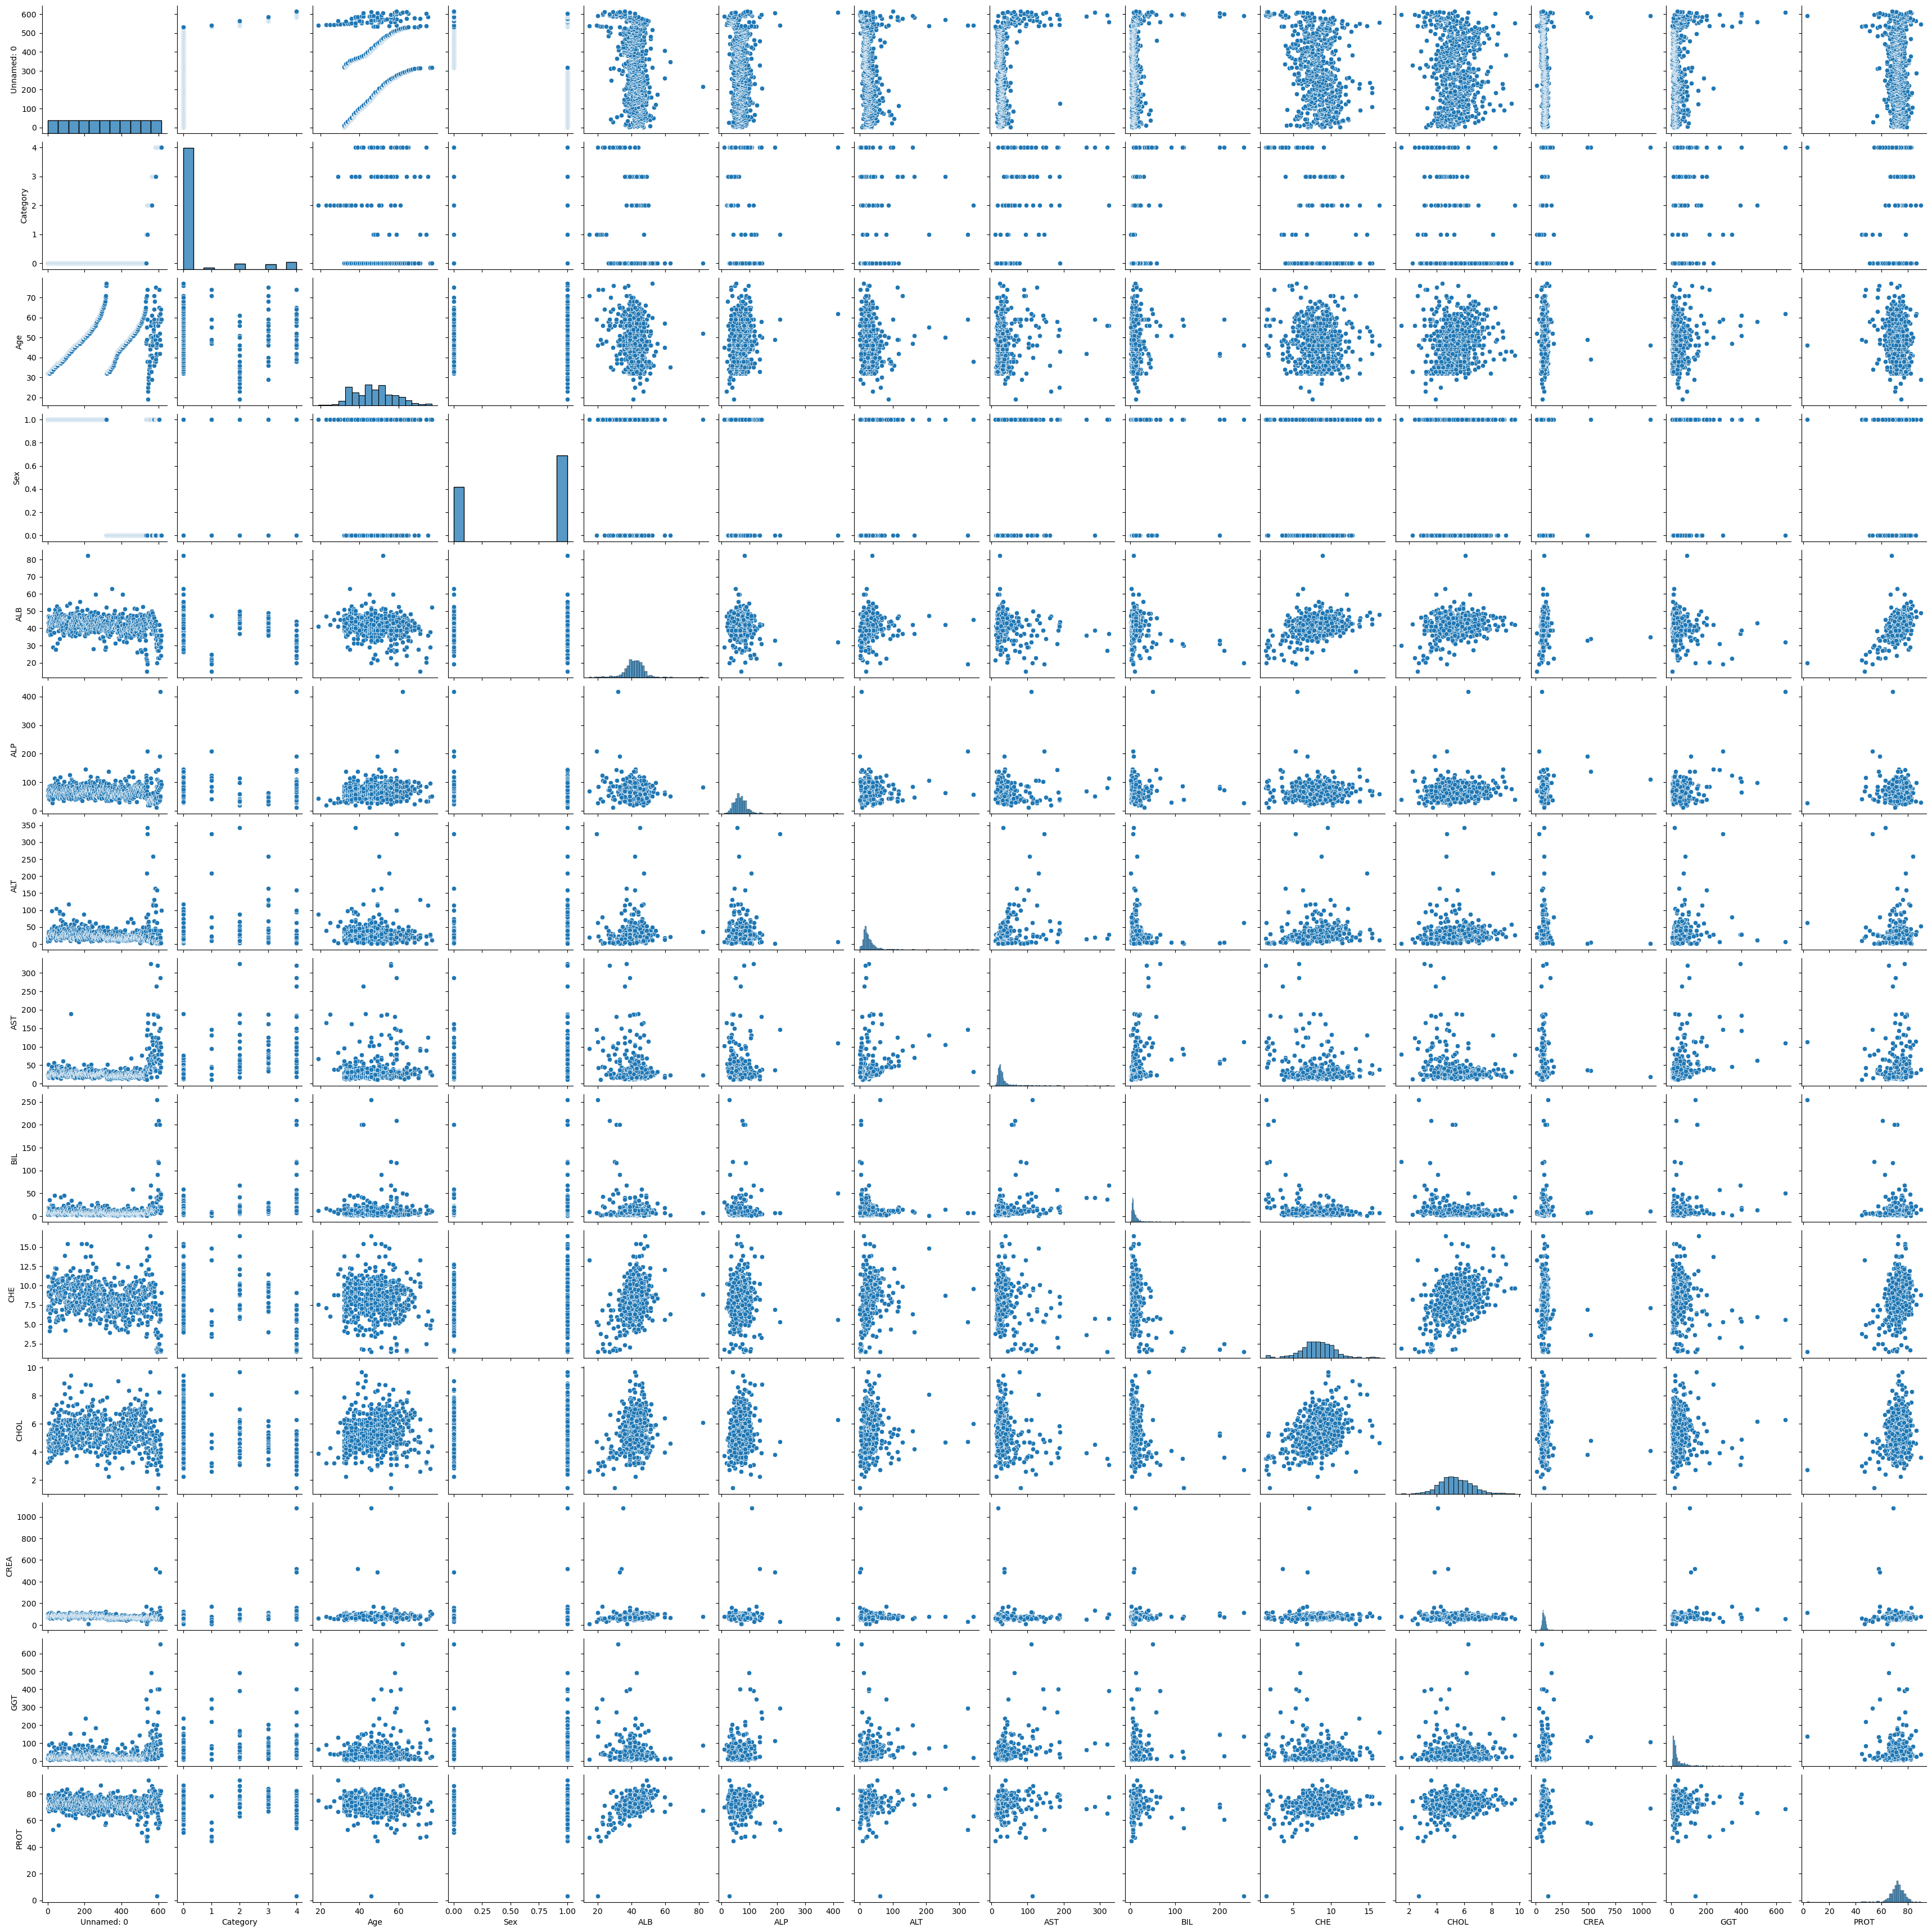

In [69]:
sns.pairplot(data)

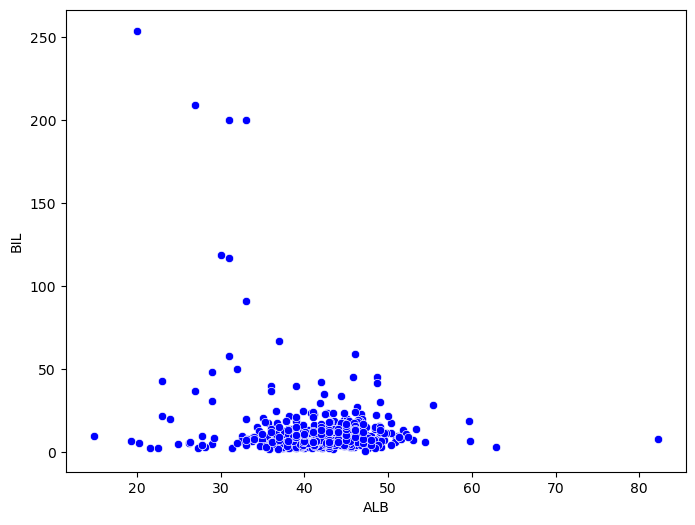

In [77]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="ALB", y="BIL",color='blue',data=data);
plt.show()

<Axes: xlabel='Sex'>

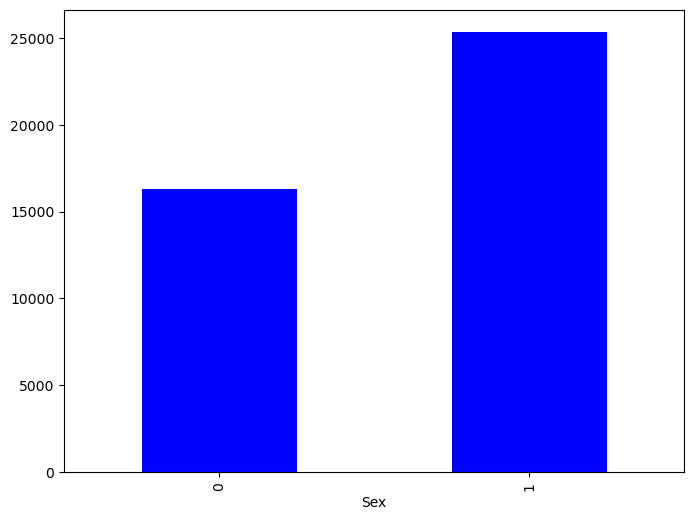

In [78]:
plt.figure(figsize=(8,6))
data.groupby('Sex').sum()["ALP"].plot.bar(color='blue')

<Axes: xlabel='Sex'>

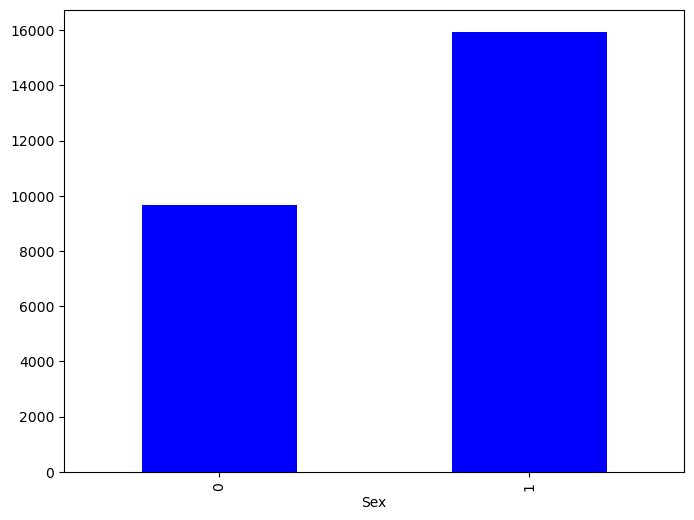

In [79]:
plt.figure(figsize=(8,6))
data.groupby('Sex').sum()['ALB'].plot.bar(color='blue')

<Axes: >

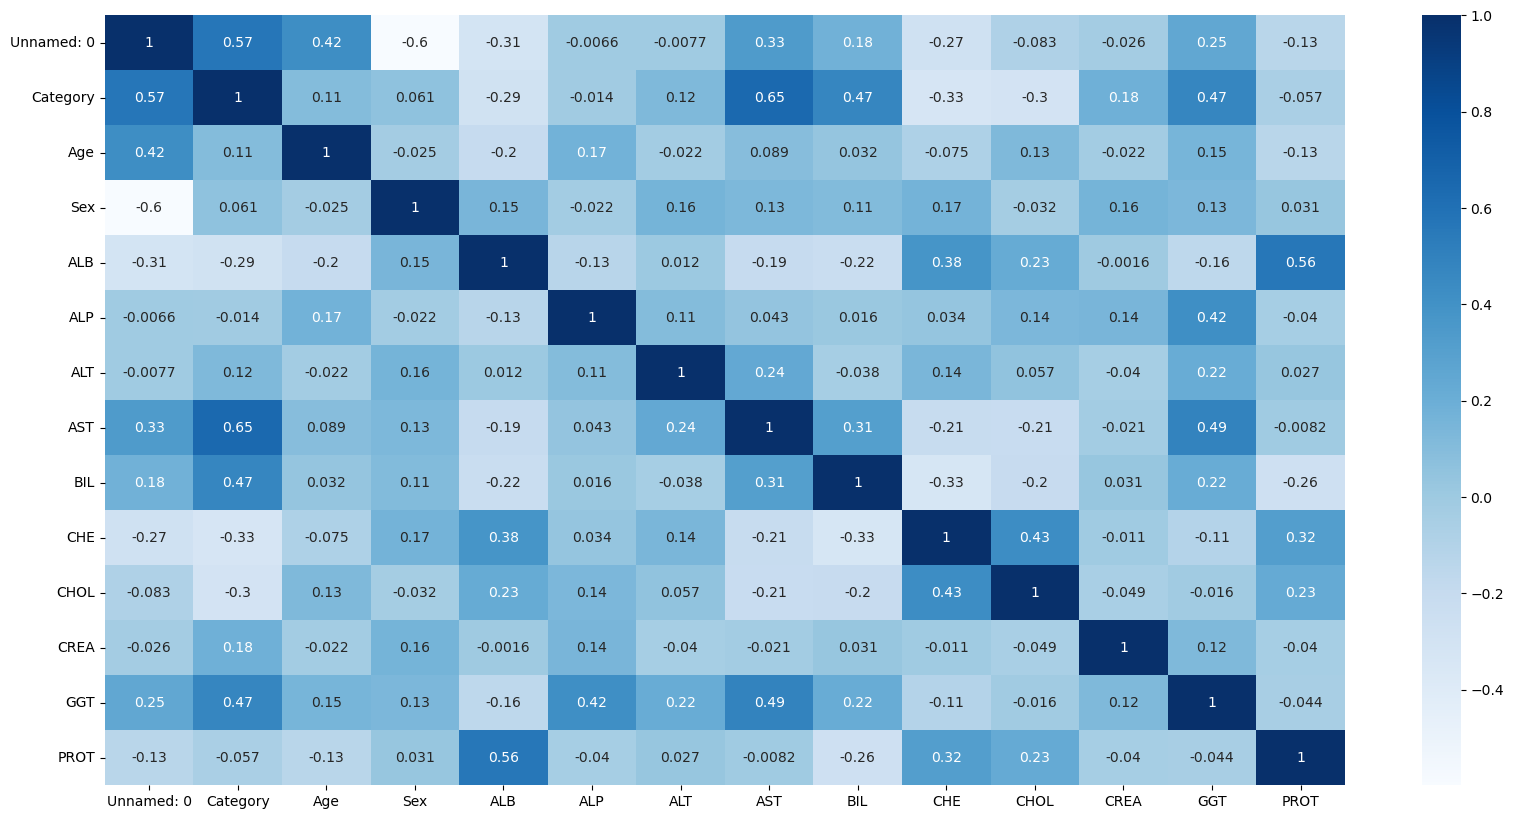

In [80]:
corr=data.corr()
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Blues",annot=True)

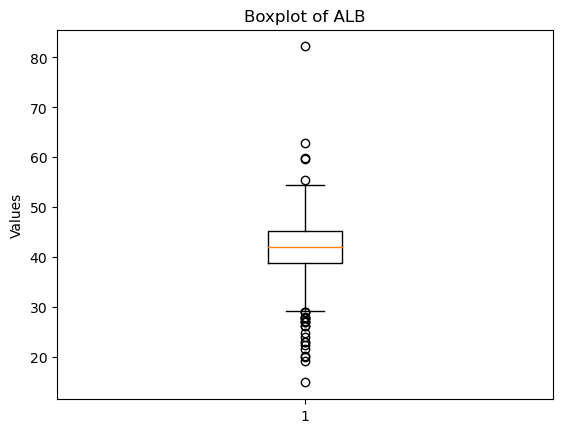

In [81]:
plt.figure()
plt.boxplot(data['ALB'])
plt.title('Boxplot of ' + 'ALB')
plt.ylabel('Values')
plt.show()

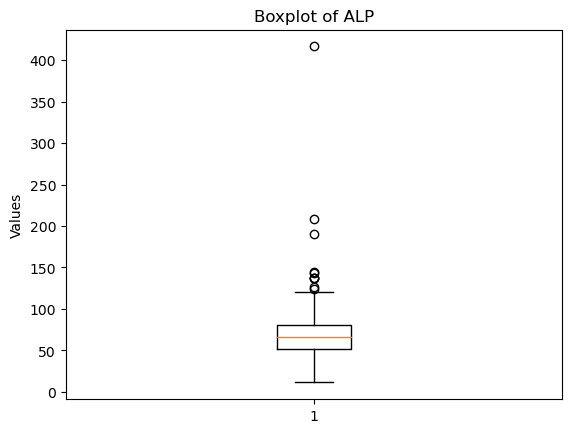

In [82]:
plt.figure()
plt.boxplot(data['ALP'])
plt.title('Boxplot of ' + 'ALP')
plt.ylabel('Values')
plt.show()

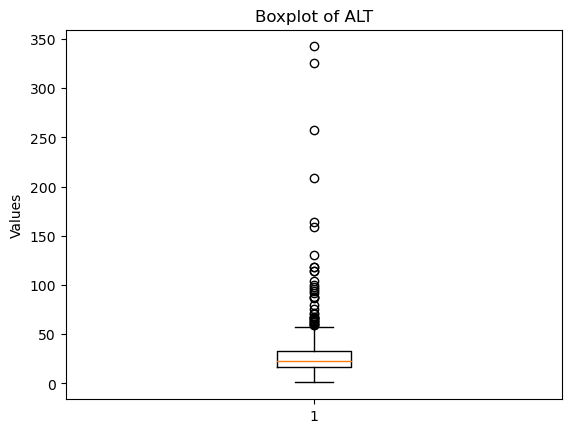

In [83]:
plt.figure()
plt.boxplot(data['ALT'])
plt.title('Boxplot of ' + 'ALT')
plt.ylabel('Values')
plt.show()

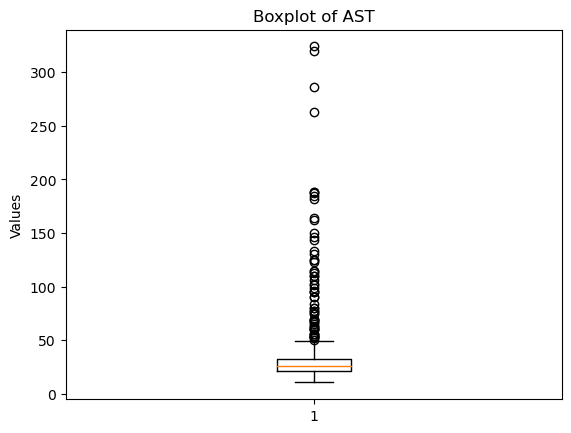

In [84]:
plt.figure()
plt.boxplot(data['AST'])
plt.title('Boxplot of ' + 'AST')
plt.ylabel('Values')
plt.show()

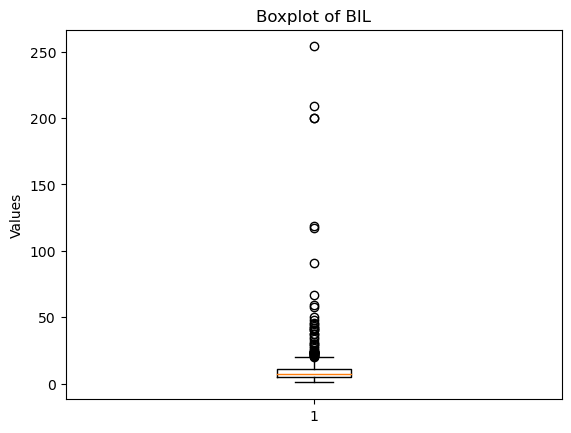

In [85]:
plt.figure()
plt.boxplot(data['BIL'])
plt.title('Boxplot of ' + 'BIL')
plt.ylabel('Values')
plt.show()

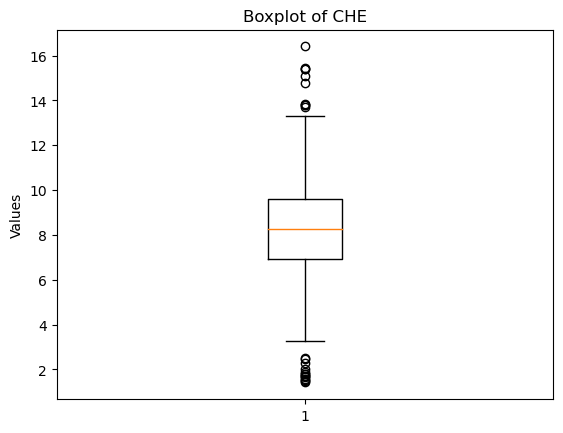

In [86]:
plt.figure()
plt.boxplot(data['CHE'])
plt.title('Boxplot of ' + 'CHE')
plt.ylabel('Values')
plt.show()

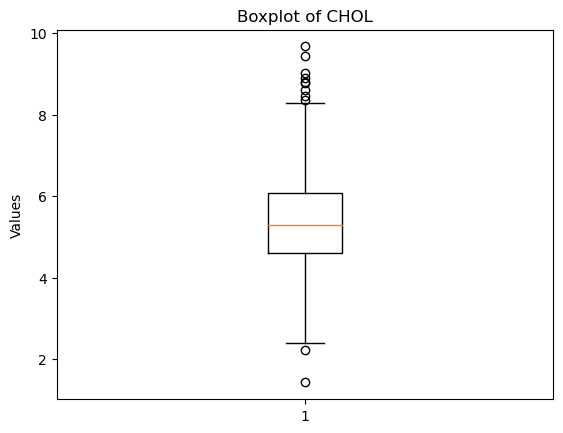

In [87]:
plt.figure()
plt.boxplot(data['CHOL'])
plt.title('Boxplot of ' + 'CHOL')
plt.ylabel('Values')
plt.show()

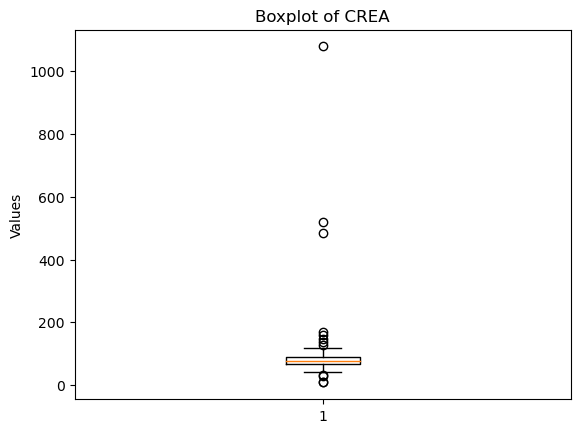

In [88]:
plt.figure()
plt.boxplot(data['CREA'])
plt.title('Boxplot of ' + 'CREA')
plt.ylabel('Values')
plt.show()

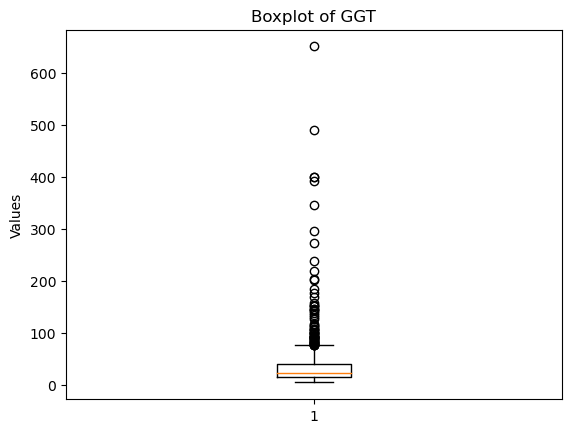

In [89]:
plt.figure()
plt.boxplot(data['GGT'])
plt.title('Boxplot of ' + 'GGT')
plt.ylabel('Values')
plt.show()

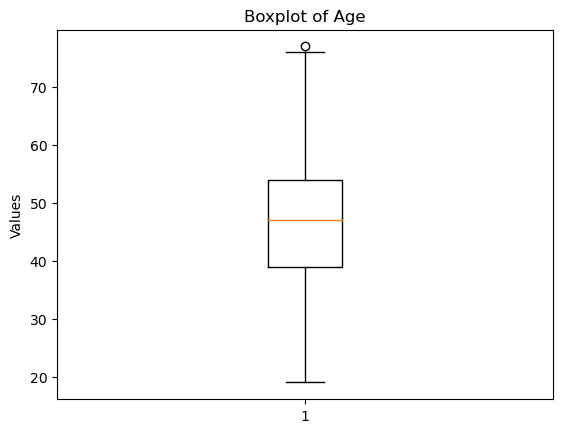

In [90]:
plt.figure()
plt.boxplot(data['Age'])
plt.title('Boxplot of ' + 'Age')
plt.ylabel('Values')
plt.show()

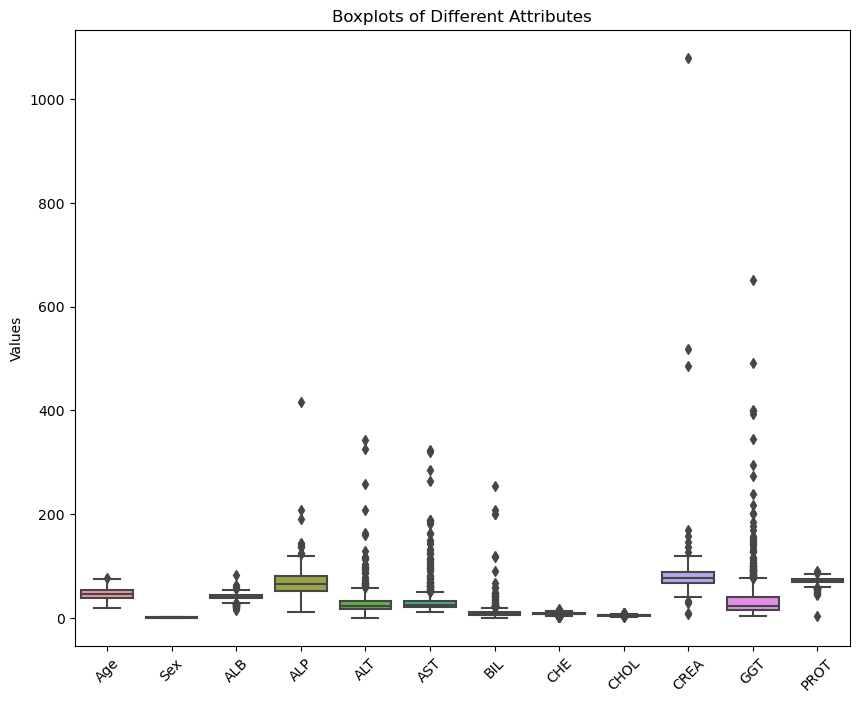

In [92]:
attributes = ["Age", "Sex", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[attributes])
plt.title('Boxplots of Different Attributes')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [103]:
import tkinter as tk
from tkinter import messagebox
from sklearn.svm import SVC
import numpy as np

svm.fit(X_train, y_train)

def check(user_input):
    for i in user_input:
        if (i == "" or not isinstance(i, (int, float))):
            return False
    return True

def predict():
    user_input = [entry.get() for entry in entries]
    
    if (check(user_input)):
        user_input_np = np.array(user_input, dtype=float).reshape(1, -1)

        prediction = svm.predict(user_input_np)

        result_window = tk.Toplevel()
        result_window.title("Prediction Result")
        result_window.geometry("600x400")
        result_label = tk.Label(result_window, text="Prediction: ")
        result_label.pack()
        if (prediction == [0]):
            result = "No Liver Disease"
        elif (prediction == [1]):
            result = "Suspicious"
        elif (prediction == [2]):
            result = "Hepatitis"
        elif (prediction == [3]):
            result = "Fibrosis"
        if (prediction == [4]):
            result = "Cirrhosis"
        result_text = tk.Label(result_window, text=result)
        result_text.pack()
    else:
        invalid_window = tk.Toplevel()
        invalid_window.title ("Invalid")
        invalid_window.geometry("600x400")
        invalid_label = tk.Label(invalid_window, text="Invalid input(s).")

window = tk.Tk()
window.title("Predictor Interface")

attributes = ["Age", "Sex (0 for female, 1 for male)", "ALB", "ALP", "ALT", "AST", "BIL", "CHE", "CHOL", "CREA", "GGT", "PROT"]
entries = []
for i, attribute in enumerate(attributes):
    tk.Label(window, text=attribute).grid(row=i, column=0, padx=10, pady=5)
    entry = tk.Entry(window)
    entry.grid(row=i, column=1, padx=20, pady=12)
    entries.append(entry)

predict_button = tk.Button(window, text="Predict", command=predict)
predict_button.grid(row=len(attributes), columnspan=2, padx=10, pady=10)

window.mainloop()

D:\ml\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_1104\1749915984.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


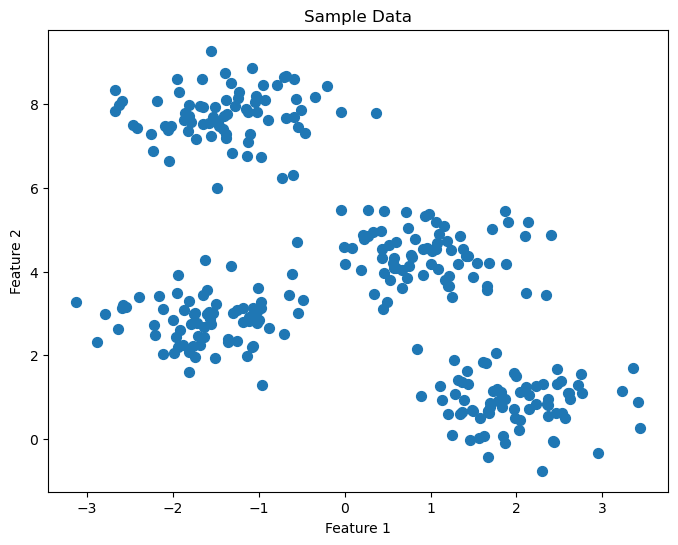

D:\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 800x600 with 0 Axes>

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Sample Data')
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

centers = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 2], X[:, 9], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, label='Cluster Centers')
plt.xlabel('Bilirubin')
plt.ylabel('Dataset')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

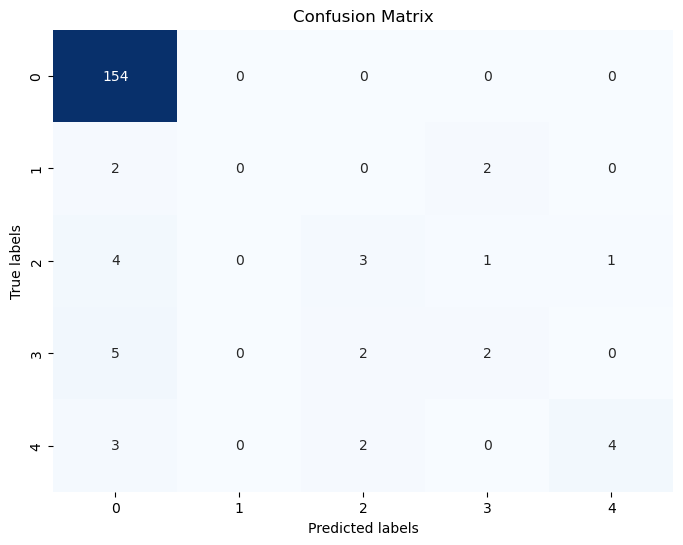

0 = Healthy, 1 = Suspicious, 2 = Hepatitis, 3 = Fibrosis, 4 = Cirrhosis


In [134]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print ("0 = Healthy, 1 = Suspicious, 2 = Hepatitis, 3 = Fibrosis, 4 = Cirrhosis")